In [1]:
from google.colab import files
upload = files.upload()

Saving star_with_gravity.csv to star_with_gravity.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("star_with_gravity.csv")

In [4]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,Canopus,310.000000,15.0,71.00,0.816115
3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
4,4,Arcturus,37.000000,1.1,26.00,0.446296


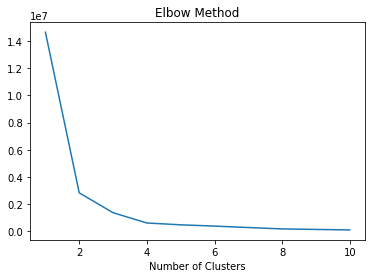

In [5]:
x = df.iloc[:,[3, 4]].values
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append((kmeans.inertia_))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.show()

In [6]:
bools = []
for d in df.Distance:
  if d <= 100:
    bools.append(True)
  else:
    bools.append(False)

In [7]:
isdist = pd.Series(bools)
isdist.head()

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [8]:
stardist = df[isdist]
stardist.reset_index(inplace = True, drop = True)
stardist.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,4,Arcturus,37.000000,1.1,26.00,0.446296
4,5,Vega,25.000000,2.2,2.70,82.769843


In [10]:
stardist.shape

(159, 6)

In [11]:
gravitybool = []
for g in stardist.Gravity:
  if g <= 350 and g >= 150:
    gravitybool.append(True)
  else:
    gravitybool.append(False)

In [12]:
isgravity = pd.Series(gravitybool)
finalstars = stardist[isgravity]
finalstars.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
7,12,Altair,17.000000,1.8,1.80,152.371756
10,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [13]:
finalstars.shape

(21, 6)

In [14]:
finalstars.reset_index(inplace = True, drop = True)
finalstars.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,12,Altair,17.000000,1.8,1.80,152.371756
4,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [15]:
finalstars.to_csv("filteredstars.csv")